# 라이브러리 불러오기

In [2]:
import pandas as pd
import transformers
import torch
import matplotlib.pyplot as plt
import re
from collections import Counter
from itertools import combinations, permutations

/opt/conda/envs/klue/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 파일 불러오기

In [3]:
train_data = pd.read_csv('../../dataset/train/train.csv')
test_data = pd.read_csv('../../dataset/test/test_data.csv')

In [4]:
train_data

,id,sentence,subject_entity,object_entity,label,source
0,24121,인천도시공사(사장 박인서)는 에너지절감 및 친환경 경영을 실천하고자 관용차량 일부를...,"{'word': '한국GM', 'start_idx': 47, 'end_idx': 5...","{'word': '자동차', 'start_idx': 61, 'end_idx': 63...",org:product,wikitree
1,10907,"스위스군은 7,000명의 보병부대와 2,000명의 기병부대로 이루어진 전위부대(포어...","{'word': '스위스군', 'start_idx': 0, 'end_idx': 3,...","{'word': '2,000명', 'start_idx': 20, 'end_idx':...",no_relation,wikipedia
2,20809,2002년 한빛은행에서 우리은행으로 행명을 변경하였다.,"{'word': '한빛은행', 'start_idx': 6, 'end_idx': 9,...","{'word': '우리은행', 'start_idx': 13, 'end_idx': 1...",org:alternate_names,wikipedia
3,18935,지난 10일 국회가 확정한 내년도 여수시 정부예산을 보면 전체 예산 중 국가(도) ...,"{'word': '여수시', 'start_idx': 66, 'end_idx': 68...","{'word': '1282억 원', 'start_idx': 52, 'end_idx'...",no_relation,wikitree
4,24880,가라스마 역은 일본 교토부 교토시 시모교구에 있는 한큐 전철 교토 본선의 역이다.,"{'word': '한큐 전철', 'start_idx': 28, 'end_idx': ...","{'word': '교토부', 'start_idx': 11, 'end_idx': 13...",org:place_of_headquarters,wikipedia
...,...,...,...,...,...,...
25971,6542,카를 5세와 그의 후계자 펠리페 2세는 개신교를 로마 가톨릭 교회에 대한 이단으로 ...,"{'word': '카를 5세', 'start_idx': 0, 'end_idx': 4...","{'word': '펠리페 2세', 'start_idx': 14, 'end_idx':...",per:children,wikipedia
25972,31215,"광양시는 동계훈련 훈련지로 축구와 씨름, 육상, 태권도, 야구 등 10개 종목, 1...","{'word': '광양시', 'start_idx': 0, 'end_idx': 2, ...","{'word': '10개', 'start_idx': 37, 'end_idx': 39...",no_relation,wikitree
25973,32247,그리고 2015년 EMI 간판 피아니스트로 활동한 피아니스트 임동혁과 슈베르트의 바...,"{'word': '임동혁', 'start_idx': 34, 'end_idx': 36...","{'word': 'EMI', 'start_idx': 10, 'end_idx': 12...",per:employee_of,wikipedia
25974,14114,1939년 11월 조선유도연합회 상임이사로 임명되었으며 1941년 2월 경학원 강사...,"{'word': '경학원', 'start_idx': 40, 'end_idx': 42...","{'word': '조선유도연합회', 'start_idx': 10, 'end_idx'...",no_relation,wikipedia


In [8]:
test_data

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree
...,...,...,...,...,...,...
7760,7760,코로나19 방역 조치의 일환으로 국민의 움직임을 통제하려는 정부의 시도를 이탈리아 ...,"{'word': '정부', 'start_idx': 33, 'end_idx': 34,...","{'word': '이탈리아', 'start_idx': 41, 'end_idx': 4...",100,wikitree
7761,7761,선 연구원은 “위식도역류질환치료제인 케이캡이 92억원 판매되면서 2019년 연간 3...,"{'word': '종근당', 'start_idx': 133, 'end_idx': 1...","{'word': '전년', 'start_idx': 143, 'end_idx': 14...",100,wikitree
7762,7762,"한국전기안전공사(사장 조성완)는 8월 1일부로, 3급 간부직원에 대한 승진·이동 인...","{'word': '한국전기안전공사', 'start_idx': 0, 'end_idx'...","{'word': '조성완', 'start_idx': 12, 'end_idx': 14...",100,wikitree
7763,7763,1987년 B. 슈나이더(B. Schneider)에 의해 만들어졌다.,"{'word': 'B. 슈나이더', 'start_idx': 6, 'end_idx':...","{'word': '1987년', 'start_idx': 0, 'end_idx': 4...",100,wikipedia


In [16]:
train_data[train_data.duplicated()]

,id,sentence,subject_entity,object_entity,label,source


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentence        32470 non-null  object
 1   subject_entity  32470 non-null  object
 2   object_entity   32470 non-null  object
 3   label           32470 non-null  object
 4   source          32470 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7765 entries, 0 to 7764
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7765 non-null   int64 
 1   sentence        7765 non-null   object
 2   subject_entity  7765 non-null   object
 3   object_entity   7765 non-null   object
 4   label           7765 non-null   int64 
 5   source          7765 non-null   object
dtypes: int64(2), object(4)
memory usage: 364.1+ KB


# Sentence Column

## 중복값과 Null값 제거
train, test data 둘다 Null값은 존재하지 않지만 train data sentence 칼럼 중 중복 값은 3667개 있고, test data 경우에는 한 개 있습니다

In [11]:
print(len(train_data), len(test_data))

32470 7765


In [12]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
print(len(train_data), len(test_data))

32470 7765


In [20]:
print(f"train data 중복 제외 전에는 {len(train_data['sentence'])}개가 있고, 중복 제외 후에는 {len(train_data['sentence'].unique())}개가 있습니다")

train data 중복 제외 전에는 32470개가 있고, 중복 제외 후에는 28803개가 있습니다


In [21]:
print(f"test data 중복 제외 전에는{len(test_data['sentence'])}개가 있고, 중복 제외 후에는 {len(test_data['sentence'].unique())}개가 있습니다")

test data 중복 제외 전에는7765개가 있고, 중복 제외 후에는 7764개가 있습니다


## sentence 칼럼 문장 길이 시각화
train data와 test data 문장 길이 시각화 결과 두 데이터셋의 문장 길이 분포는 동일한 것으로 확인 되었습니다

train data 문장 길이 시각화

(array([6.2240e+03, 1.4638e+04, 7.4180e+03, 2.6710e+03, 9.0700e+02,
        3.8200e+02, 1.2100e+02, 7.0000e+01, 2.9000e+01, 1.0000e+01]),
 array([ 14. ,  58.1, 102.2, 146.3, 190.4, 234.5, 278.6, 322.7, 366.8,
        410.9, 455. ]),
 <BarContainer object of 10 artists>)

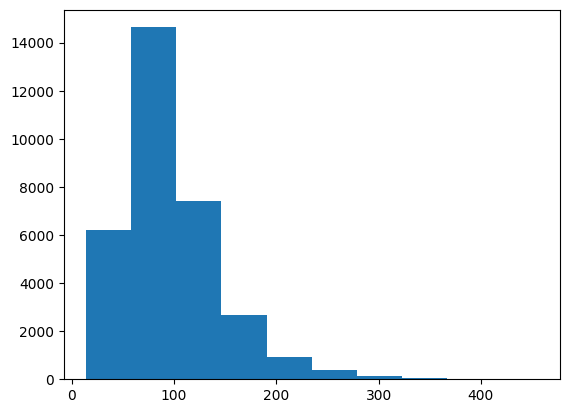

In [25]:
train_word_len_per_sent = list(map(len, train_data['sentence']))
plt.hist(train_word_len_per_sent)

test data 문장 길이 시각화

(array([1.725e+03, 3.214e+03, 1.806e+03, 7.160e+02, 2.070e+02, 6.200e+01,
        2.300e+01, 7.000e+00, 4.000e+00, 1.000e+00]),
 array([ 17. ,  58.5, 100. , 141.5, 183. , 224.5, 266. , 307.5, 349. ,
        390.5, 432. ]),
 <BarContainer object of 10 artists>)

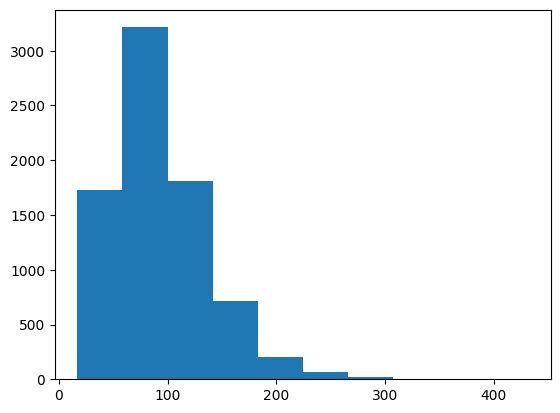

In [26]:
test_word_len_per_sent = list(map(len, test_data['sentence']))
plt.hist(test_word_len_per_sent)

## 한자가 포함되어 있는 데이터

In [39]:
sentence_with_chin = 0
subject_with_chin = 0
object_with_chin = 0
for i in range(len(train_data)):
    if re.findall('[/一-龥/]+', train_data.iloc[i, 1]):
        sentence_with_chin += 1
    if re.findall('[/一-龥/]+', train_data.iloc[i, 2]):
        subject_with_chin += 1
    if re.findall('[/一-龥/]+', train_data.iloc[i, 3]):
        object_with_chin += 1
print(f"Train data Sentence에 한자가 포함되어 있는 데이터의 개수는 {sentence_with_chin}개이고, subject에 포함된 데이터는 {subject_with_chin}개이고, object는 {object_with_chin}개입니다")

Train data Sentence에 한자가 포함되어 있는 데이터의 개수는 2504개이고, subject에 포함된 데이터는 3개이고, object는 175개입니다


In [41]:
sentence_with_chin = 0
subject_with_chin = 0
object_with_chin = 0
for i in range(len(test_data)):
    if re.findall('[/一-龥/]+', test_data.iloc[i, 1]):
        sentence_with_chin += 1
    if re.findall('[/一-龥/]+', test_data.iloc[i, 2]):
        subject_with_chin += 1
    if re.findall('[/一-龥/]+', test_data.iloc[i, 3]):
        object_with_chin += 1
print(f"Test data Sentence에 한자가 포함되어 있는 데이터의 개수는 {sentence_with_chin}개이고, subject에 포함된 데이터는 {subject_with_chin}개이고, object는 {object_with_chin}개입니다")

Test data Sentence에 한자가 포함되어 있는 데이터의 개수는 406개이고, subject에 포함된 데이터는 33개이고, object는 24개입니다


In [37]:
for i in range(len(train_data)):
    if re.findall('[/一-龥/]+', train_data.iloc[i, 2]):
        print(train_data.iloc[i, 2])

{'word': '金基昶', 'start_idx': 4, 'end_idx': 6, 'type': 'PER'}
{'word': '가톨릭平和放送', 'start_idx': 8, 'end_idx': 14, 'type': 'ORG'}
{'word': '크루즈/와그너 프로덕션스', 'start_idx': 0, 'end_idx': 12, 'type': 'ORG'}


In [31]:
train_data.iloc[7, 1]

'박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ 2009년 11월 4일)는 서울에서 태어난 대한민국의 기업인으로 두산그룹 회장, KBO 총재 등을 역임했다.'

In [32]:
for i in range(len(train_data)):
    train_data.iloc[i, 1] = re.sub(r'[/一-龥/]+', '', train_data.iloc[i, 1])

In [33]:
train_data.iloc[7, 1]

'박용오(, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ 2009년 11월 4일)는 서울에서 태어난 대한민국의 기업인으로 두산그룹 회장, KBO 총재 등을 역임했다.'

## 토큰화 후 embedding 길이
subject_entity[SEP]object_entity[SEP]sentence[SEP]으로 입력 시퀀스를 정해준 후, 토큰화 된 후 train, test data 최대 길이는 512입니다

In [12]:
tokenizer = transformers.AutoTokenizer.from_pretrained('klue/roberta-large', max_length=400)

In [6]:
sub_ent = []
obj_ent = []
for i in range(len(train_data)):
    sub_ent.append(train_data.iloc[i, 2].split(',')[0].split(':')[1][2:-1])
    obj_ent.append(train_data.iloc[i, 3].split(',')[0].split(':')[1][2:-1])
total_emb = []
for i in range(len(train_data)):
    total_emb.append(sub_ent[i]+'[SEP]'+obj_ent[i]+'[SEP]'+train_data.iloc[i, 1]+'[SEP]')
tokenized_emb = tokenizer(total_emb, add_special_tokens=True, padding='max_length')['input_ids']
print(f'토큰화 된 후 train data 최대 길이는 {max(list(map(len, tokenized_emb)))}입니다')

토큰화 된 후 train data 최대 길이는 512입니다


In [13]:
sub_ent = []
obj_ent = []
for i in range(len(test_data)):
    sub_ent.append(test_data.iloc[i, 2].split(',')[0].split(':')[1][2:-1])
    obj_ent.append(test_data.iloc[i, 3].split(',')[0].split(':')[1][2:-1])
total_emb = []
for i in range(len(test_data)):
    total_emb.append(sub_ent[i]+'[SEP]'+obj_ent[i]+'[SEP]'+test_data.iloc[i, 1]+'[SEP]')
tokenized_emb = tokenizer(total_emb, add_special_tokens=True, padding='max_length')['input_ids']
print(f'토큰화 된 후 test data 최대 길이는 {max(list(map(len, tokenized_emb)))}입니다')

토큰화 된 후 test data 최대 길이는 512입니다


# Subject / Object Entity Column
활용 방법: 단어의 type을 토대로 만약 per/colleague일 시 두 개의 entity가 per, per이 아니라면 존재할 수 없으므로 여러 가지 휴리스틱 적용(맞지 않은 레이블에 대하여 가중치 곱해주기 등), maybe CRF 층 추가

### Train

베이스라인 코드 문제 발견: subject / object Entity 전처리 시 ','를 기준으로 split을 해주는데 이러면 word 안에 쉼표가 존재 할 시에 word 전체가 아닌 부분만 input에 포함 된다\
임시 해결: regex로 '' 안에 있는 값들만 가져와서 마지막 요소 반환 == type, start_index와 end_index 정보 포함 안되있기 떄문에 나중에 고쳐야함

In [113]:
train_data.iloc[5872, 3]

"{'word': '희극 배우, MC, 배우, 가수', 'start_idx': 32, 'end_idx': 48, 'type': 'POH'}"

In [123]:
train_data.iloc[5872, 3].split(',')[0].split(':')[1]

" '희극 배우"

In [137]:
re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[5872, 3])[1]

"'희극 배우, MC, 배우, 가수'"

In [16]:
object_with_comma = 0
subject_with_comma = 0
for idx, (i, j) in enumerate(zip(train_data['subject_entity'], train_data['object_entity'])):
    i, j = eval(i), eval(j)
    if ',' in i['word']:
        if re.findall(r'[가-힣]+, ', i['word']):
            subject_with_comma += 1
    if ',' in j['word']:
        if re.findall(r'[가-힣]+, ', j['word']):
            object_with_comma += 1
print(f"word 안에 쉼표가 들어간 데이터의 갯수는 {subject_with_comma}개, {object_with_comma}개입니다")

word 안에 쉼표가 들어간 데이터의 갯수는 0개, 60개입니다


In [18]:
aug_data = 0
for i in range(len(train_data)):
    if ',' in re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[i, 3])[1]:
        aug_data += re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[i, 3])[1].count(',') + 1
print(f"증강 할 수 있는 데이터의 개수는 {aug_data}개입니다")

증강 할 수 있는 데이터의 개수는 1202개입니다


subject 칼럼은 word: 타겟 단어, start_idx: 타겟 단어의 시작 위치, end_idx: 타겟 단어의 종료 위치, type: org, per 등 레이블의 첫 번쨰 값 정보 포함\
object 칼럼은 word: 타겟 단어, start_idx: 타겟 단어의 시작 위치, end_idx: 타겟 단어의 종료 위치, type: "'DAT'", "'PER'", "'NOH'", "'ORG'", "'POH'", "'LOC'" 등 레이블 두 번쨰 값 정보 포함\
PER: 사람\
ORG: 단체\
DAT: 날짜 정보\
NOH: 숫자 관련 정보(키, 몸무게, 인구 등)\
POH: 직업 관련 정보(배우, 아나운서 등)\
LOC: 위치 정보\
혹은 entity 단어 앞 뒤에 PER, ORG, DAT 등 special token 추가해주는 실험 또한 시도해 볼만한 것 같다

In [87]:
sub_types = []
obj_types = []
for i in range(len(train_data)):
    sub_types.append(re.findall(r'\'[\w]+\'', train_data.iloc[i, 2])[-1])
    obj_types.append(re.findall(r'\'[\w]+\'', train_data.iloc[i, 3])[-1])
print(f'train data subject_entity 고유값은 {list(set(sub_types))}이며, object_entity 고유값은 {list(set(obj_types))}입니다')

train data subject_entity 고유값은 ["'PER'", "'ORG'"]이며, object_entity 고유값은 ["'DAT'", "'PER'", "'NOH'", "'ORG'", "'POH'", "'LOC'"]입니다


### Test

In [92]:
sub_types = []
obj_types = []
for i in range(len(test_data)):
    sub_types.append(re.findall(r'\'[\w]+\'', test_data.iloc[i, 2])[-1])
    obj_types.append(re.findall(r'\'[\w]+\'', test_data.iloc[i, 3])[-1])
print(f'test data subject_entity 고유값은 {list(set(sub_types))}이며, object_entity 고유값은 {list(set(obj_types))}입니다')

test data subject_entity 고유값은 ["'LOC'", "'PER'", "'ORG'"]이며, object_entity 고유값은 ["'DAT'", "'PER'", "'NOH'", "'ORG'", "'POH'", "'LOC'"]입니다


# Label Column

## Label 분포 시각화
라벨 분포 시각화 결과 no_relation이 가장 높았고, org와 per의 비율은 비슷하게 포진되어 있으나 org가 조금 더 많은 것으로 확인 되었습니다

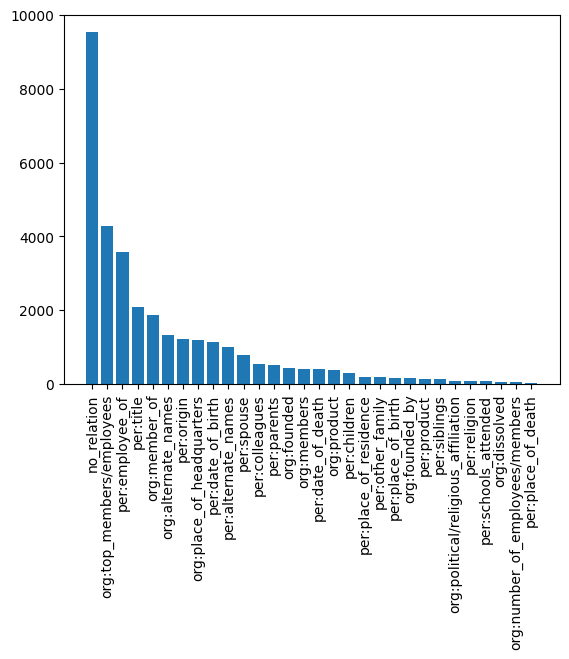

In [122]:
plt.bar(train_data['label'].value_counts().index, train_data['label'].value_counts())
plt.xticks(rotation=90)
plt.show()

per, org, no_relation 세 가지 경우에 대해서 평균 문장 길이를 구했고, 각각의 개수 또한 카운트해주었습니다. 평균 길이는 per < org < no_relation 순입니다.

In [124]:
per_length = 0
org_length = 0
per_count = 0
org_count = 0
no_relation_length = 0
no_relation_count = 0
for i in range(len(train_data)):
    if train_data.iloc[i, 4][:3] == 'per':
        per_length += len(train_data.iloc[i, 1])
        per_count += 1
    elif train_data.iloc[i, 4][:3] == 'org':
        org_length += len(train_data.iloc[i, 1])
        org_count += 1
    else:
        no_relation_length += len(train_data.iloc[i, 1])
        no_relation_count += 1
print(per_length // per_count, per_count)
print(org_length // org_count, org_count)
print(no_relation_length // no_relation_count, no_relation_count)

88 12654
99 10282
104 9534


# Source Column
Train data와 test data 모두 source는 wikipedia, wikitree, policy_briefing에서 가져왔으며, 세 가지 데이터셋 특성상 서면어로 이루어진 문장이 주를 이룹니다\
개수 순은 policy_briefing < wikitree < wikipedia순입니다.

In [125]:
print(f"Train data의 Source Column의 고유값은 {train_data['source'].unique()}이며, test data는 {test_data['source'].unique()}입니다")

Train data의 Source Column의 고유값은 ['wikipedia' 'wikitree' 'policy_briefing']이며, test data는 ['wikitree' 'wikipedia' 'policy_briefing']입니다


<BarContainer object of 3 artists>

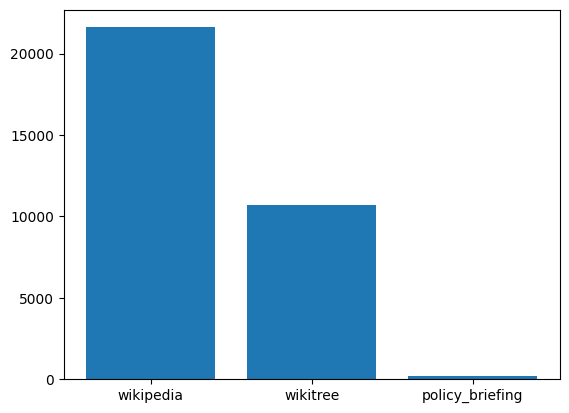

In [130]:
plt.bar(train_data['source'].value_counts().index, train_data['source'].value_counts())

<BarContainer object of 3 artists>

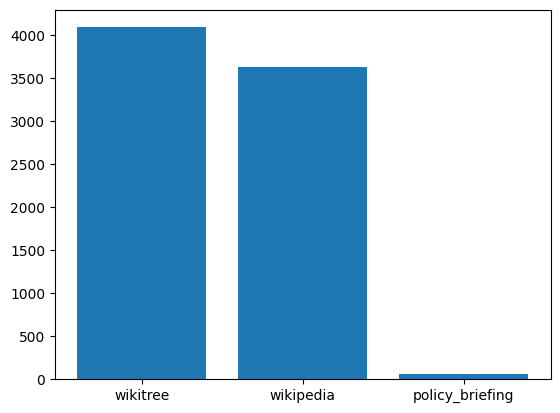

In [131]:
plt.bar(test_data['source'].value_counts().index, test_data['source'].value_counts())

# 데이터셋의 편향 확인

In [20]:
label_list = ['no_relation', 'org:top_members/employees', 'org:members',
       'org:product', 'per:title', 'org:alternate_names',
       'per:employee_of', 'org:place_of_headquarters', 'per:product',
       'org:number_of_employees/members', 'per:children',
       'per:place_of_residence', 'per:alternate_names',
       'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
       'per:spouse', 'org:founded', 'org:political/religious_affiliation',
       'org:member_of', 'per:parents', 'org:dissolved',
       'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
       'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
       'per:religion']

In [142]:
for i in range(30):
    sub_bow = []
    obj_bow = []
    for j in range(len(train_data)):
        if train_data.iloc[j, 4] == label_list[i]:
            sub_bow.append(re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[j, 2])[1])
            obj_bow.append(re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[j, 3])[1])
    sub_counter = Counter(sub_bow)
    obj_counter = Counter(obj_bow)
    sub_most = sub_counter.most_common(10)
    obj_most = obj_counter.most_common(10)
    sub_most = [sub_most[i][0] for i in range(5)]
    obj_most = [obj_most[i][0] for i in range(5)]
    print(f"{label_list[i]}의 subject_entity 최대 빈도 수 단어들은 {sub_most}이며, object_entity 최대 빈도 수 단어들은 {obj_most}입니다")

no_relation의 subject_entity 최대 빈도 수 단어들은 ["'민주당'", "', '", "'두산 베어스'", "'FC 서울'", "'삼성 라이온즈'"]이며, object_entity 최대 빈도 수 단어들은 ["', '", "'2016년'", "'물리학'", "'더불어민주당'", "'2007'"]입니다
org:top_members/employees의 subject_entity 최대 빈도 수 단어들은 ["'화순군'", "'고흥군'", "'광주광역시'", "'영암군'", "'목포시'"]이며, object_entity 최대 빈도 수 단어들은 ["'구충곤'", "'송귀근'", "'이용섭'", "'이선재'", "'전동평'"]입니다
org:members의 subject_entity 최대 빈도 수 단어들은 ["'KBO 리그'", "'캐나다'", "'제주특별자치도'", "'러시아'", "'신세계'"]이며, object_entity 최대 빈도 수 단어들은 ["'두산 베어스'", "'KIA 타이거즈'", "'미래한국당'", "'제주시'", "'모스크바'"]입니다
org:product의 subject_entity 최대 빈도 수 단어들은 ["'엔씨소프트'", "'삼성전자'", "'대림산업'", "'SK하이닉스'", "'영광군'"]이며, object_entity 최대 빈도 수 단어들은 ["'자동차'", "'반도체'", "'제네시스'", "'리니지2M'", "'e편한세상'"]입니다
per:title의 subject_entity 최대 빈도 수 단어들은 ["'박능후'", "'전희경'", "'이재용'", "'김영록'", "'김정호'"]이며, object_entity 최대 빈도 수 단어들은 ["'골키퍼'", "'독립운동가'", "'아나운서'", "'소설가'", "'비례대표'"]입니다
org:alternate_names의 subject_entity 최대 빈도 수 단어들은 ["'문화방송'", "'유럽 축구 연맹'", "'국제수영연맹'", "'국제축구연맹'", "', '"]이며, 

In [22]:
for i in range(30):
    sub_bow = []
    obj_bow = []
    for j in range(len(train_data)):
        if train_data.iloc[j, 4] == label_list[i]:
            sub_bow.append(re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[j, 2])[-1])
            obj_bow.append(re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[j, 3])[-1])
    sub_counter = Counter(sub_bow)
    obj_counter = Counter(obj_bow)
    sub_most = sub_counter.most_common(2)
    obj_most = obj_counter.most_common(2)
    if len(sub_most) >= 2 and len(obj_most) >= 2:
        sub_most = [sub_most[i][0] for i in range(2)]
        obj_most = [obj_most[i][0] for i in range(2)]
    elif len(sub_most) >= 2 and len(obj_most) == 1:
        sub_most = [sub_most[i][0] for i in range(2)]
        obj_most = obj_most[0][0]
    elif len(sub_most) == 2 and len(obj_most) >= 2:
        sub_most = sub_most[0][0]
        obj_most = [obj_most[i][0] for i in range(2)]
    else:
        sub_most = sub_most[0][0]
        obj_most = obj_most[0][0]
    print(f"{label_list[i]}의 subject_entity 최대 빈도 수 Entity type들은 {sub_most}이며, object_entity 최대 빈도 수 Entity type들은 {obj_most}입니다")

no_relation의 subject_entity 최대 빈도 수 Entity type들은 ["'ORG'", "'PER'"]이며, object_entity 최대 빈도 수 Entity type들은 ["'ORG'", "'DAT'"]입니다
org:top_members/employees의 subject_entity 최대 빈도 수 Entity type들은 ["'ORG'", "'PER'"]이며, object_entity 최대 빈도 수 Entity type들은 ["'PER'", "'POH'"]입니다
org:members의 subject_entity 최대 빈도 수 Entity type들은 ["'ORG'", "'PER'"]이며, object_entity 최대 빈도 수 Entity type들은 ["'ORG'", "'LOC'"]입니다
org:product의 subject_entity 최대 빈도 수 Entity type들은 'ORG'이며, object_entity 최대 빈도 수 Entity type들은 'POH'입니다
per:title의 subject_entity 최대 빈도 수 Entity type들은 'PER'이며, object_entity 최대 빈도 수 Entity type들은 'POH'입니다
org:alternate_names의 subject_entity 최대 빈도 수 Entity type들은 'ORG'이며, object_entity 최대 빈도 수 Entity type들은 'ORG'입니다
per:employee_of의 subject_entity 최대 빈도 수 Entity type들은 'PER'이며, object_entity 최대 빈도 수 Entity type들은 'ORG'입니다
org:place_of_headquarters의 subject_entity 최대 빈도 수 Entity type들은 ["'ORG'", "'PER'"]이며, object_entity 최대 빈도 수 Entity type들은 ["'LOC'", "'ORG'"]입니다
per:product의 subject_entit

In [25]:
principal = {}
for i in range(30):
    sub_bow = []
    obj_bow = []
    for j in range(len(train_data)):
        if train_data.iloc[j, 4] == label_list[i]:
            sub_bow.append(re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[j, 2])[-1])
            obj_bow.append(re.findall(r'\'[\w\s\d,]+\'', train_data.iloc[j, 3])[-1])
    sub_counter = Counter(sub_bow)
    obj_counter = Counter(obj_bow)
    sub_most = sub_counter.most_common(6)
    obj_most = obj_counter.most_common(6)
    sub_most = [sub_most[k] for k in range(len(sub_most))]
    obj_most = [obj_most[k] for k in range(len(obj_most))]
    principal[label_list[i]] = [sub_most, obj_most]
principal

{'no_relation': [[("'ORG'", 5406), ("'PER'", 4128)],
  [("'ORG'", 2699),
   ("'DAT'", 2087),
   ("'PER'", 1800),
   ("'POH'", 1780),
   ("'LOC'", 858),
   ("'NOH'", 310)]],
 'org:top_members/employees': [[("'ORG'", 4283), ("'PER'", 1)],
  [("'PER'", 4196),
   ("'POH'", 52),
   ("'ORG'", 22),
   ("'LOC'", 13),
   ("'NOH'", 1)]],
 'org:members': [[("'ORG'", 419), ("'PER'", 1)],
  [("'ORG'", 285),
   ("'LOC'", 97),
   ("'POH'", 32),
   ("'PER'", 3),
   ("'NOH'", 2),
   ("'DAT'", 1)]],
 'org:product': [[("'ORG'", 380)],
  [("'POH'", 304), ("'ORG'", 48), ("'LOC'", 24), ("'PER'", 3), ("'NOH'", 1)]],
 'per:title': [[("'PER'", 2103)],
  [("'POH'", 1845),
   ("'ORG'", 141),
   ("'LOC'", 81),
   ("'NOH'", 19),
   ("'PER'", 14),
   ("'DAT'", 3)]],
 'org:alternate_names': [[("'ORG'", 1320)],
  [("'ORG'", 1154),
   ("'POH'", 106),
   ("'PER'", 31),
   ("'LOC'", 23),
   ("'NOH'", 5),
   ("'DAT'", 1)]],
 'per:employee_of': [[("'PER'", 3573)],
  [("'ORG'", 2857),
   ("'PER'", 391),
   ("'LOC'", 165),


각 레이블당 전체 개수 / 등장 횟수를 가중치로 두어 마지막 확률값에 가중치 곱해주기

# Multi Entity 데이터 증강
word 안에 쉼표가 존재하는 데이터에 대해서 다음과 같은 증강을 해보았다\
1. 쉼표를 기준으로 모든 데이터를 나눈 후, 한 개씩만 넣은 데이터 증강
2. 쉼표를 기준으로 모든 데이터의 combination을 구한 후, 증강
3. 쉼표를 기준으로 모든 데이터의 permutation을 구한 후, 증강

In [66]:
multi_entity = []
for idx, i in enumerate(train_data['object_entity']):
    i = eval(i)
    if ',' in i['word']:
        if re.findall(r'[가-힣]+, ', i['word']):
            multi_entity.append([train_data.iloc[idx, 1], train_data.iloc[idx, 2], list(map(str.strip, i['word'].split(','))), i['type'], train_data.iloc[idx, 4], train_data.iloc[idx, 5]])
print(multi_entity, len(multi_entity))

[["작가, 시인, 싱어송라이터로 불리는 하상욱 씨는 지난 2012년 발행한 시집 '서울 시'가 베스트셀러에 등극하며 크게 인기를 끌었다.", "{'word': '하상욱', 'start_idx': 20, 'end_idx': 22, 'type': 'PER'}", ['시인', '싱어송라이터'], 'POH', 'per:title', 'wikitree'], ['강수지(1967년 5월 20일 ~)는 대한민국의 가수, 작사가, 방송인 등이다.', "{'word': '강수지', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}", ['가수', '작사가', '방송인'], 'POH', 'per:title', 'wikipedia'], ['서민정(1979년 7월 11일 ~)은 대한민국의 배우, 방송인이다.', "{'word': '서민정', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}", ['배우', '방송인'], 'POH', 'per:title', 'wikipedia'], ['랴오이우(1958년 8월 4일 ~)는 필명인 라오웨이로 알려져 있는 중국의 작가, 시인, 언론인, 음악가이다.', "{'word': '랴오이우', 'start_idx': 0, 'end_idx': 3, 'type': 'PER'}", ['작가', '시인', '언론인', '음악가'], 'POH', 'per:title', 'wikipedia'], ['안예은(1992년 5월 21일 ~)은 대한민국의 가수, 싱어송라이터이다.', "{'word': '안예은', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}", ['가수', '싱어송라이터'], 'POH', 'per:title', 'wikipedia'], ['노스트라다무스(1503년 12월 14일 ~ 1566년 7월 2일)는 프랑스의 천문학자, 의사, 예언가이다.', "{'word': '노스트라다무스', 'start_idx': 0, 'end_idx': 6, 'type': 'P

In [67]:
multi_label_aug_one = pd.DataFrame(columns=['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'])
multi_label_aug_com = pd.DataFrame(columns=['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'])
multi_label_aug_per = pd.DataFrame(columns=['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'])
idx = 0
for i in range(len(multi_entity)):
    for j in range(len(multi_entity[i][2])):
        #print(idx)
        obj_entity = "{'word':'%s', 'start_idx': 0, 'end_idx': 0, 'type': '%s'}" %(multi_entity[i][2][j], multi_entity[i][3])
        dummy = [idx] + multi_entity[i][:2] + [obj_entity] + multi_entity[i][4:]
        #print(dummy)
        multi_label_aug_one.loc[idx] = dummy
        idx += 1
    combi = []
    for j in range(1, len(multi_entity[i][2])):
        combi += list(combinations(multi_entity[i][2], j))
    for j in range(len(combi)):
        entity = ', '.join(combi[j])
        obj_entity = "{'word':'%s', 'start_idx': 0, 'end_idx': 0, 'type': '%s'}" %(entity, multi_entity[i][3])
        dummy = [idx] + multi_entity[i][:2] + [obj_entity] + multi_entity[i][4:]
        #print(dummy)
        multi_label_aug_com.loc[idx] = dummy
        idx += 1
    permu = []
    for j in range(1, len(multi_entity[i][2])):
        permu += list(permutations(multi_entity[i][2], j))
    for j in range(len(permu)):
        entity = ', '.join(permu[j])
        obj_entity = "{'word':'%s', 'start_idx': 0, 'end_idx': 0, 'type': '%s'}" %(entity, multi_entity[i][3])
        dummy = [idx] + multi_entity[i][:2] + [obj_entity] + multi_entity[i][4:]
        #print(dummy)
        multi_label_aug_per.loc[idx] = dummy
        idx += 1
print(multi_label_aug_per)

          id                                           sentence  \
4          4  작가, 시인, 싱어송라이터로 불리는 하상욱 씨는 지난 2012년 발행한 시집 '서울...   
5          5  작가, 시인, 싱어송라이터로 불리는 하상욱 씨는 지난 2012년 발행한 시집 '서울...   
15        15       강수지(1967년 5월 20일 ~)는 대한민국의 가수, 작사가, 방송인 등이다.   
16        16       강수지(1967년 5월 20일 ~)는 대한민국의 가수, 작사가, 방송인 등이다.   
17        17       강수지(1967년 5월 20일 ~)는 대한민국의 가수, 작사가, 방송인 등이다.   
...      ...                                                ...   
70447  70447  제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...   
70448  70448  제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...   
70449  70449  제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...   
70454  70454  서마라 위빙(Samara Weaving, 1992년 2월 23일 ~)은 오스트레일리...   
70455  70455  서마라 위빙(Samara Weaving, 1992년 2월 23일 ~)은 오스트레일리...   

                                          subject_entity  \
4      {'word': '하상욱', 'start_idx': 20, 'end_idx': 22...   
5      {'word': '하상욱', 'start_idx': 20, 'end_idx': 22...   
15     {'word':

In [68]:
multi_label_aug_one = pd.concat([train_data, multi_label_aug_one], ignore_index=True)
multi_label_aug_com = pd.concat([train_data, multi_label_aug_com], ignore_index=True)
multi_label_aug_per = pd.concat([train_data, multi_label_aug_per], ignore_index=True)

In [69]:
multi_label_aug_one.tail(10)

,id,sentence,subject_entity,object_entity,label,source
26088,854,"베루키(능력치에 따라 시라소몬, 홍수몬, 카포에라 3종 중 하나), 이브이(진화 방...","{'word': '이브이', 'start_idx': 38, 'end_idx': 40...","{'word':'블래키', 'start_idx': 0, 'end_idx': 0, '...",no_relation,wikipedia
26089,855,"베루키(능력치에 따라 시라소몬, 홍수몬, 카포에라 3종 중 하나), 이브이(진화 방...","{'word': '이브이', 'start_idx': 38, 'end_idx': 40...","{'word':'리피아', 'start_idx': 0, 'end_idx': 0, '...",no_relation,wikipedia
26090,856,"베루키(능력치에 따라 시라소몬, 홍수몬, 카포에라 3종 중 하나), 이브이(진화 방...","{'word': '이브이', 'start_idx': 38, 'end_idx': 40...","{'word':'글레이시아', 'start_idx': 0, 'end_idx': 0,...",no_relation,wikipedia
26091,857,"베루키(능력치에 따라 시라소몬, 홍수몬, 카포에라 3종 중 하나), 이브이(진화 방...","{'word': '이브이', 'start_idx': 38, 'end_idx': 40...","{'word':'님피아', 'start_idx': 0, 'end_idx': 0, '...",no_relation,wikipedia
26092,70392,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'작가', 'start_idx': 0, 'end_idx': 0, 't...",per:title,wikipedia
26093,70393,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'정치인', 'start_idx': 0, 'end_idx': 0, '...",per:title,wikipedia
26094,70394,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'언론인', 'start_idx': 0, 'end_idx': 0, '...",per:title,wikipedia
26095,70395,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'수필가', 'start_idx': 0, 'end_idx': 0, '...",per:title,wikipedia
26096,70450,"서마라 위빙(Samara Weaving, 1992년 2월 23일 ~)은 오스트레일리...","{'word': '서마라 위빙', 'start_idx': 0, 'end_idx': ...","{'word':'배우', 'start_idx': 0, 'end_idx': 0, 't...",per:title,wikipedia
26097,70451,"서마라 위빙(Samara Weaving, 1992년 2월 23일 ~)은 오스트레일리...","{'word': '서마라 위빙', 'start_idx': 0, 'end_idx': ...","{'word':'모델', 'start_idx': 0, 'end_idx': 0, 't...",per:title,wikipedia


In [55]:
multi_label_aug_com.tail(10)

,id,sentence,subject_entity,object_entity,label,source
33040,70913,"토드 하워드(Todd Howard)는 미국의 비디오게임 디자이너, 감독, 프로듀서다.","{'word': '토드 하워드', 'start_idx': 0, 'end_idx': ...","{'word':'비디오게임 디자이너, 프로듀서', 'start_idx': 0, 'e...",per:title,wikipedia
33041,70914,"토드 하워드(Todd Howard)는 미국의 비디오게임 디자이너, 감독, 프로듀서다.","{'word': '토드 하워드', 'start_idx': 0, 'end_idx': ...","{'word':'감독, 프로듀서', 'start_idx': 0, 'end_idx':...",per:title,wikipedia
33042,70926,"클로이 베넷(1992년 4월 18일 ~)은 미국의 배우, 가수이다.","{'word': '클로이 베넷', 'start_idx': 0, 'end_idx': ...","{'word':'배우', 'start_idx': 0, 'end_idx': 0, 't...",per:title,wikipedia
33043,70927,"클로이 베넷(1992년 4월 18일 ~)은 미국의 배우, 가수이다.","{'word': '클로이 베넷', 'start_idx': 0, 'end_idx': ...","{'word':'가수', 'start_idx': 0, 'end_idx': 0, 't...",per:title,wikipedia
33044,70933,"잭 앵글린(Jack Anglin, 1916년 5월 13일 ~ 1963년 3월 8일)...","{'word': '잭 앵글린', 'start_idx': 0, 'end_idx': 4...","{'word':'가수', 'start_idx': 0, 'end_idx': 0, 't...",per:title,wikipedia
33045,70934,"잭 앵글린(Jack Anglin, 1916년 5월 13일 ~ 1963년 3월 8일)...","{'word': '잭 앵글린', 'start_idx': 0, 'end_idx': 4...","{'word':'작사가', 'start_idx': 0, 'end_idx': 0, '...",per:title,wikipedia
33046,70935,"잭 앵글린(Jack Anglin, 1916년 5월 13일 ~ 1963년 3월 8일)...","{'word': '잭 앵글린', 'start_idx': 0, 'end_idx': 4...","{'word':'기타 연주자', 'start_idx': 0, 'end_idx': 0...",per:title,wikipedia
33047,70936,"잭 앵글린(Jack Anglin, 1916년 5월 13일 ~ 1963년 3월 8일)...","{'word': '잭 앵글린', 'start_idx': 0, 'end_idx': 4...","{'word':'가수, 작사가', 'start_idx': 0, 'end_idx': ...",per:title,wikipedia
33048,70937,"잭 앵글린(Jack Anglin, 1916년 5월 13일 ~ 1963년 3월 8일)...","{'word': '잭 앵글린', 'start_idx': 0, 'end_idx': 4...","{'word':'가수, 기타 연주자', 'start_idx': 0, 'end_idx...",per:title,wikipedia
33049,70938,"잭 앵글린(Jack Anglin, 1916년 5월 13일 ~ 1963년 3월 8일)...","{'word': '잭 앵글린', 'start_idx': 0, 'end_idx': 4...","{'word':'작사가, 기타 연주자', 'start_idx': 0, 'end_id...",per:title,wikipedia


In [70]:
multi_label_aug_per.tail(10)

,id,sentence,subject_entity,object_entity,label,source
95818,70442,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'언론인, 수필가, 작가', 'start_idx': 0, 'end_i...",per:title,wikipedia
95819,70443,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'언론인, 수필가, 정치인', 'start_idx': 0, 'end_...",per:title,wikipedia
95820,70444,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'수필가, 작가, 정치인', 'start_idx': 0, 'end_i...",per:title,wikipedia
95821,70445,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'수필가, 작가, 언론인', 'start_idx': 0, 'end_i...",per:title,wikipedia
95822,70446,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'수필가, 정치인, 작가', 'start_idx': 0, 'end_i...",per:title,wikipedia
95823,70447,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'수필가, 정치인, 언론인', 'start_idx': 0, 'end_...",per:title,wikipedia
95824,70448,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'수필가, 언론인, 작가', 'start_idx': 0, 'end_i...",per:title,wikipedia
95825,70449,제1대 바르가스 요사 후작 호르헤 마리오 페드로 바르가스 요사(1936년 3월 28...,"{'word': '호르헤 마리오 페드로 바르가스 요사', 'start_idx': 1...","{'word':'수필가, 언론인, 정치인', 'start_idx': 0, 'end_...",per:title,wikipedia
95826,70454,"서마라 위빙(Samara Weaving, 1992년 2월 23일 ~)은 오스트레일리...","{'word': '서마라 위빙', 'start_idx': 0, 'end_idx': ...","{'word':'배우', 'start_idx': 0, 'end_idx': 0, 't...",per:title,wikipedia
95827,70455,"서마라 위빙(Samara Weaving, 1992년 2월 23일 ~)은 오스트레일리...","{'word': '서마라 위빙', 'start_idx': 0, 'end_idx': ...","{'word':'모델', 'start_idx': 0, 'end_idx': 0, 't...",per:title,wikipedia


In [71]:
multi_label_aug_one.to_csv("../../dataset/train/multi_label_aug_one.csv")
multi_label_aug_com.to_csv("../../dataset/train/multi_label_aug_com.csv")
multi_label_aug_per.to_csv("../../dataset/train/multi_label_aug_per.csv")

In [5]:
print(1e-01)

0.1
